# MMSegmentation Tutorial
Welcome to MMSegmentation! 

In this tutorial, we demo
* How to do inference with MMSeg trained weight
* How to train on your own dataset and visualize the results. 

## Install MMSegmentation
This step may take several minutes. 

We use PyTorch 1.5.0 and CUDA 10.1 for this tutorial. You may install other versions by change the version number in pip install command. 

In [1]:
# Testar sem algumas classes.
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!pip list | grep torch

torch               1.8.1+cu101
torchvision         0.9.1+cu101


In [3]:
# Install PyTorch
!pip install -U torch==1.8.1+cu101 torchvision==0.9.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [4]:
!pip list | grep mmcv

mmcv-full           1.4.1


In [5]:
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html

#!pip install mmcv-full==1.3.5+torch1.5.0+cu101 -f https://download.openmmlab.com/mmcv/dist/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html


In [6]:
!rm -rf mmsegmentation
!git clone -b v0.20.0 https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 5563, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 5563 (delta 36), reused 44 (delta 27), pack-reused 5489
Receiving objects: 100% (5563/5563), 11.94 MiB | 14.25 MiB/s, done.
Resolving deltas: 100% (4072/4072), done.
Note: switching to 'bdfbaf00c1f55e054e6088e60f955345ab7383c0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

/home/neto/projects/tcc/mmsegmentation
Obtaining file:///home/neto/proj

In [7]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
print(torchvision.__version__)

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.8.1+cu101 True
0.9.1+cu101
0.20.0


## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are neccessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

### Add a new dataset

Datasets in MMSegmentation require image and semantic segmentation maps to be placed in folders with the same perfix. To support a new dataset, we may need to modify the original file structure. 

In this tutorial, we give an example of converting the dataset. You may refer to [docs](https://github.com/open-mmlab/mmsegmentation/docs/tutorials/new_dataset.md) for details about dataset reorganization. 

We use [Standord Background Dataset](http://dags.stanford.edu/projects/scenedataset.html) as an example. The dataset contains 715 images chosen from existing public datasets [LabelMe](http://labelme.csail.mit.edu), [MSRC](http://research.microsoft.com/en-us/projects/objectclassrecognition), [PASCAL VOC](http://pascallin.ecs.soton.ac.uk/challenges/VOC) and [Geometric Context](http://www.cs.illinois.edu/homes/dhoiem/). Images from these datasets are mainly outdoor scenes, each containing approximately 320-by-240 pixels. 
In this tutorial, we use the region annotations as labels. There are 8 classes in total, i.e. sky, tree, road, grass, water, building, mountain, and foreground object. 

In [8]:
# download and unzip
# !wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O standford_background.tar.gz
#!cp /home/neto/Documents/displasia-ROI-classes/segmentation/segmentation.zip ./
!unzip ../segmentation.zip

Archive:  ../segmentation.zip
   creating: segmentation/
   creating: segmentation/images/
  inflating: segmentation/images/image003-2-roi1.jpg  
  inflating: segmentation/images/image003-2-roi2.jpg  
  inflating: segmentation/images/image003-2-roi3.jpg  
  inflating: segmentation/images/image003-2-roi4.jpg  
  inflating: segmentation/images/image003-2-roi5.jpg  
  inflating: segmentation/images/image004-roi1.jpg  
  inflating: segmentation/images/image004-roi2.jpg  
  inflating: segmentation/images/image004-roi3.jpg  
  inflating: segmentation/images/image004-roi4.jpg  
  inflating: segmentation/images/image004-roi5.jpg  
  inflating: segmentation/images/image005-2-roi1.jpg  
  inflating: segmentation/images/image005-2-roi2.jpg  
  inflating: segmentation/images/image005-2-roi3.jpg  
  inflating: segmentation/images/image005-2-roi4.jpg  
  inflating: segmentation/images/image005-roi1.jpg  
  inflating: segmentation/images/image005-roi2.jpg  
  inflating: segmentation/images/image005-r

  inflating: segmentation/annotations/image038-roi5.jpg  
  inflating: segmentation/annotations/image038-roi6.jpg  
  inflating: segmentation/annotations/image039-roi1.jpg  
  inflating: segmentation/annotations/image039-roi2.jpg  
  inflating: segmentation/annotations/image039-roi3.jpg  
  inflating: segmentation/annotations/image043-roi1.jpg  
  inflating: segmentation/annotations/image043-roi2.jpg  
  inflating: segmentation/annotations/image043-roi3.jpg  
  inflating: segmentation/annotations/image043-roi4.jpg  
  inflating: segmentation/annotations/image050-roi1.jpg  
  inflating: segmentation/annotations/image050-roi2.jpg  
  inflating: segmentation/annotations/image050-roi3.jpg  
  inflating: segmentation/annotations/image050-roi4.jpg  
  inflating: segmentation/annotations/image050-roi5.jpg  
  inflating: segmentation/annotations/image058-roi1.jpg  
  inflating: segmentation/annotations/image058-roi2.jpg  
  inflating: segmentation/annotations/image058-roi3.jpg  
  inflating: s

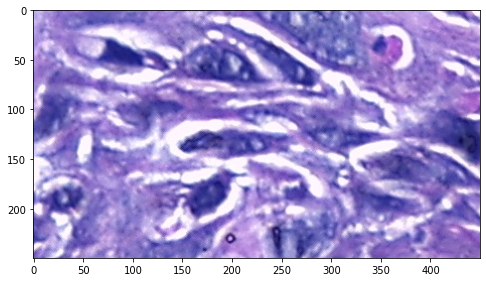

In [9]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('segmentation/images/image062-roi2.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

We need to convert the annotation into semantic map format as an image.

In [10]:
# NÃO PRECISA RODAR
# OLHAR O COMENTÁRIO DA PRÓXIMA CÉLULA SOBRE AS ANOTAÇÕES.

import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = 'dataset/segmentation'
img_dir = 'all_seg_jpg'
ann_dir = 'annotation/ann_jpg'
# define class and plaette for better visualization
classes = ('backgroud', 'cell')
palette = [[0, 0, 0], [255, 255, 255]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
    seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))
    seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', 
                                                         '.png')))

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/segmentation/annotation/ann_jpg'

In [11]:
data_root = 'segmentation'
img_dir = 'images'
ann_dir = 'annotations'

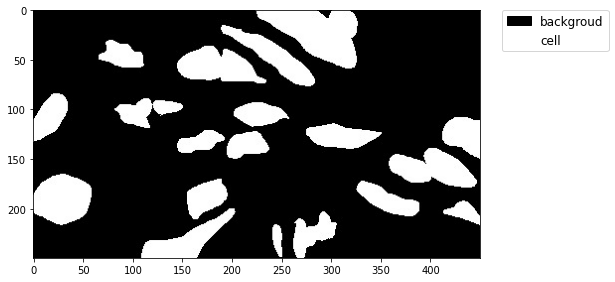

In [12]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
from PIL import Image
import numpy as np

classes = ('backgroud', 'cell')
# TESTAR OLHAR PARA AS ANOTAÇÕES PARA ENTENDER SE BATE COM A PALHETA DE CORES DEFINIDAS AQUI
palette = [[0, 0, 0], [255, 255, 255]]

img = Image.open('segmentation/annotations/image062-roi2.jpg')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(2)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [13]:
np.array(img).shape

(250, 450)

In [14]:
# split train/val set randomly
import os.path as osp
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.jpg')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
    train_length = int(len(filename_list)*4/5)
    f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
    # select last 1/5 as train set
    f.writelines(line + '\n' for line in filename_list[train_length:])

After downloading the data, we need to implement `load_annotations` function in the new dataset class `StandfordBackgroundDataset`.

In [15]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class DysplasiaDataset(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        print(kwargs)
        super().__init__(img_suffix='.jpg', seg_map_suffix='.jpg',
                     split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

### Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [25]:
from mmcv import Config
# cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')
cfg = Config.fromfile('configs/unet/unet_test.py')

Since the given config is used to train PSPNet on cityscapes dataset, we need to modify it accordingly for our new dataset.  

In [26]:
from mmseg.apis import set_random_seed

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2
cfg.model.auxiliary_head.num_classes = 2

# Modify dataset type and path
cfg.dataset_type = 'DysplasiaDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu = 8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
# cfg.load_from = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 200
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=None,
    backbone=dict(
        type='UNet',
        in_channels=3,
        base_channels=64,
        num_stages=5,
        strides=(1, 1, 1, 1, 1),
        enc_num_convs=(2, 2, 2, 2, 2),
        dec_num_convs=(2, 2, 2, 2),
        downsamples=(True, True, True, True),
        enc_dilations=(1, 1, 1, 1, 1),
        dec_dilations=(1, 1, 1, 1),
        with_cp=False,
        conv_cfg=None,
        norm_cfg=dict(type='BN', requires_grad=True),
        act_cfg=dict(type='ReLU'),
        upsample_cfg=dict(type='InterpConv'),
        norm_eval=False),
    decode_head=dict(
        type='ASPPHead',
        in_channels=64,
        in_index=4,
        channels=16,
        dilations=(1, 12, 24, 36),
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropy

### Train and Evaluation

In [27]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

In [28]:
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

/home/neto/anaconda3/envs/torch_gpu/lib/python3.9/site-packages/mmcv/utils/misc.py:333: UserWarning: "flip_ratio" is deprecated in `RandomFlip.__init__`, please use "prob" instead
  warnings.warn(
2022-01-04 20:11:59,623 - mmseg - INFO - Loaded 96 images


{'data_root': 'segmentation', 'img_dir': 'images', 'ann_dir': 'annotations', 'pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'LoadAnnotations'}, {'type': 'Resize', 'img_scale': (320, 240), 'ratio_range': (0.5, 2.0)}, {'type': 'RandomCrop', 'crop_size': (256, 256), 'cat_max_ratio': 0.75}, {'type': 'RandomFlip', 'flip_ratio': 0.5}, {'type': 'PhotoMetricDistortion'}, {'type': 'Normalize', 'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'to_rgb': True}, {'type': 'Pad', 'size': (256, 256), 'pad_val': 0, 'seg_pad_val': 255}, {'type': 'DefaultFormatBundle'}, {'type': 'Collect', 'keys': ['img', 'gt_semantic_seg']}]}


In [29]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-01-04 20:12:03,627 - mmseg - INFO - Loaded 24 images
2022-01-04 20:12:03,627 - mmseg - INFO - Start running, host: neto@Matheus-Neto, work_dir: /home/neto/projects/tcc/mmsegmentation/work_dirs/tutorial
2022-01-04 20:12:03,628 - mmseg - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
 -------------------- 
after_train_iter:
(ABOVE

{'data_root': 'segmentation', 'img_dir': 'images', 'ann_dir': 'annotations', 'pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'MultiScaleFlipAug', 'img_scale': (320, 240), 'flip': False, 'transforms': [{'type': 'Resize', 'keep_ratio': True}, {'type': 'RandomFlip'}, {'type': 'Normalize', 'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'to_rgb': True}, {'type': 'ImageToTensor', 'keys': ['img']}, {'type': 'Collect', 'keys': ['img']}]}], 'test_mode': True}


RuntimeError: CUDA out of memory. Tried to allocate 256.00 MiB (GPU 0; 3.94 GiB total capacity; 2.86 GiB already allocated; 168.31 MiB free; 2.91 GiB reserved in total by PyTorch)

Inference with trained model

In [ ]:
img = mmcv.imread('segmentation/annotations/image023-roi1.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

In [ ]:
%cd mmsegmentation
import mmcv
img = mmcv.imread('segmentation/annotations/image023-roi1.jpg')

In [ ]:
img.min()

In [ ]:
img.max()

In [ ]:
img